# 13.9: Анализ оттока клиентов банка

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pyplt=plotly.offline.plot

In [3]:
churn=pd.read_csv('data/churn.csv')

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn.drop('RowNumber', axis=1) #удаляем столбец RowNumbers, для анализа он не нужен

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

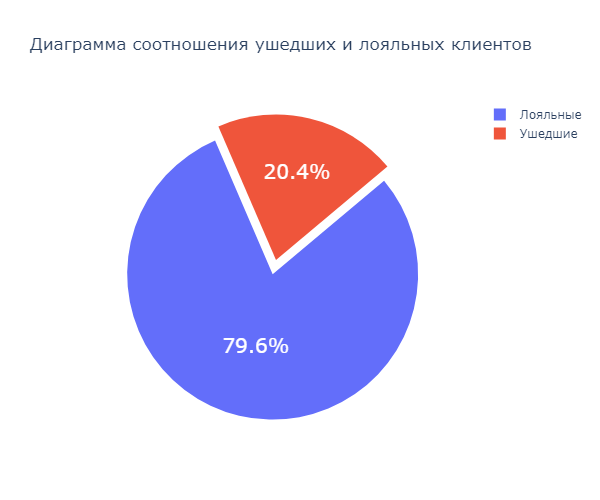

In [6]:
values=[churn[churn['Exited']==0]['Exited'].count(), churn[churn['Exited']==1]['Exited'].count()]
labels=['Лояльные', 'Ушедшие']
trace=[go.Pie(
    labels=labels,
    values=values,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent',
    textinfo='percent',
    textfont=dict(size=20,color='white'))]
layout=go.Layout(
    title='Диаграмма соотношения ушедших и лояльных клиентов',
    width=600,
    height=500
)
fig=go.Figure(
    data=trace,
    layout=layout
    )
fig.show('png')


Как видно из диаграммы процент ушедших клиентов составляет 20.4%, это говорит о том, что каждый пятый клиент решает уйти. Несмотря на то, что большая часть клиентов остается на обслуживании, банку стоит обратить внимание на отток клиентов.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

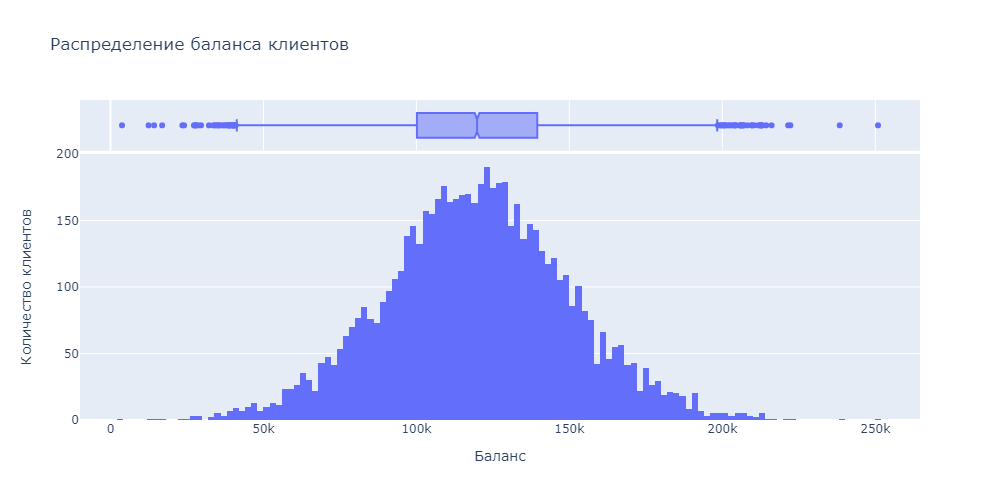

In [7]:
fig_data=churn[churn['Balance']>2500]

fig = px.histogram(
    data_frame=fig_data,
    x='Balance',
    title='Распределение баланса клиентов',
    marginal='box', # Построим рядом коробчатую диаграмму для наглядности выбросов
    labels={'Balance': 'Баланс'},
    width=1000
)
fig.update_layout(xaxis_title="Баланс",
                  yaxis_title="Количество клиентов",
                  )
fig.show('png')

Медианная распределения суммы на счету клиентов составляет $ 119k. Клиенты банка хранят на своих счетах суммы от 100 до 150 тысяч долларов,
что может говорить о том, что основная часть потребителей пользуются услугами банка для накопления денежных средств.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

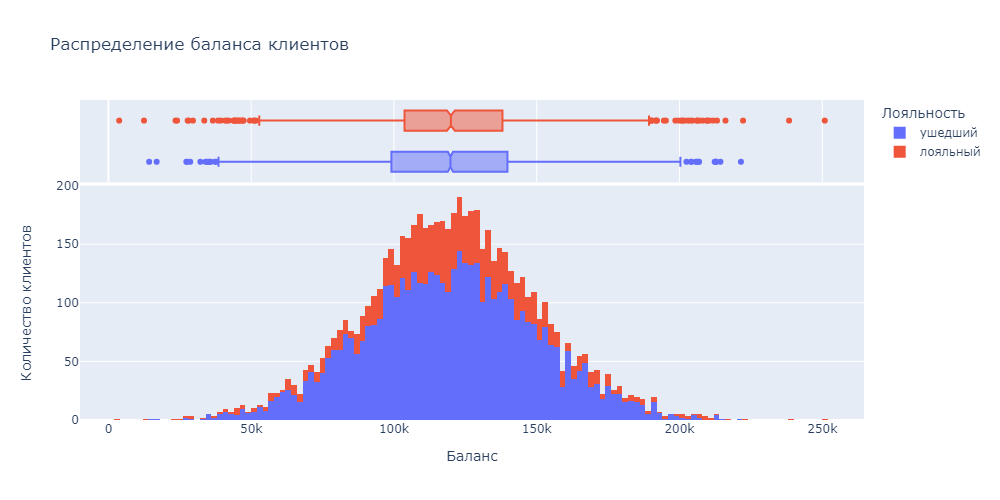

In [80]:

fig_data=churn[churn['Balance']>2500]

fig = px.histogram(
    data_frame=fig_data,
    x='Balance',
    title='Распределение баланса клиентов',
    marginal='box', # Построим рядом коробчатую диаграмму для наглядности выбросов
    labels={'Balance': 'Баланс', 'color':'Лояльность', 'count':'Количество'},
    width=1000,
    color=fig_data['Exited'].map({0:'ушедший', 1:'лояльный'})
)
fig.update_layout(xaxis_title="Баланс",
                  yaxis_title="Количество клиентов",
                  )

fig.show('png')


Медианная распределения баланса ушедших и лояльных клиентов почти равна. В основном уходят клиенты с заработком ближе к среднему. Несмотря на выбросы в категории ушедших клиентов, в целом баланс не сильно влияет на желание клиента прекратить обслуживание в банке.

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

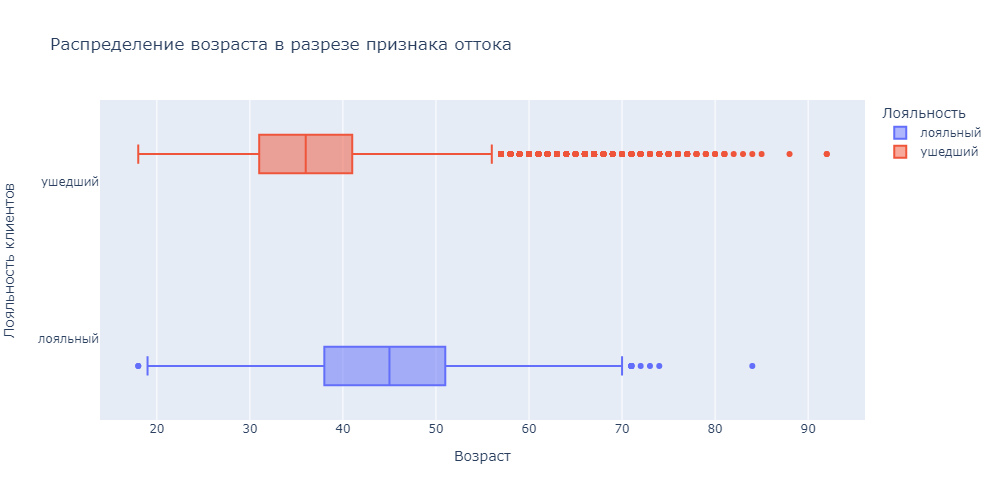

In [81]:
fig = px.box(
    data_frame=churn,
    x='Age',
    y=churn['Exited'].map({0:'ушедший', 1:'лояльный'}),
    title='Распределение возраста в разрезе признака оттока',
    color=churn['Exited'].map({0:'ушедший', 1:'лояльный'}),
    labels={'Age': 'Возраст','color': 'Лояльность'},
    width=1000
)
fig.update_layout(xaxis_title="Возраст",
                  yaxis_title="Лояльность клиентов",
                  )
fig.show('png')

Из диаграммы видно явное смещение медианной возраста ушедших людей. Чаще всего отказываются от банковского обслуживания клиенты в возрасте от 31 до 41 года. Так же видно большое количество выборосов среди клиентов старше 57 лет. Возможно клиентам более молодого возраста недостаточно услуг, соответствующих их потребностям.

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

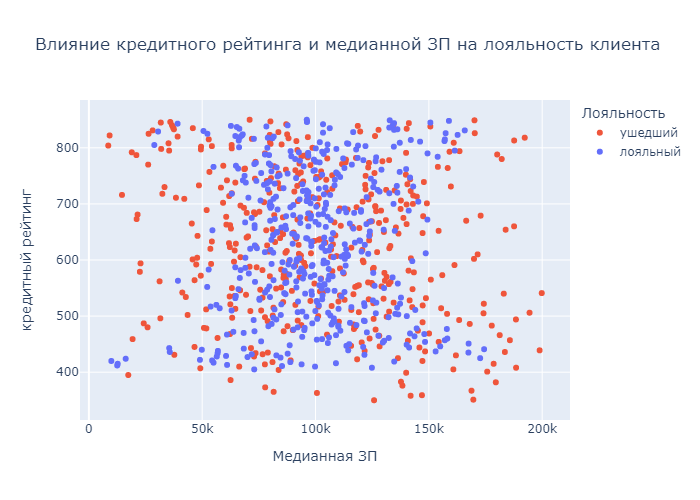

In [101]:
fig_data=churn.groupby(
    ['CreditScore', 'Exited'],
    as_index=False
)[['EstimatedSalary']].median()

fig=px.scatter(
    fig_data,
    y='CreditScore',
    x='EstimatedSalary',
    color=fig_data['Exited'].map({0:'лояльный', 1:'ушедший'}),
    labels={'color': 'Лояльность', 'CreditScore':'кредитный рейтинг', 'EstimatedSalary':'Медианная ЗП'},
    color_discrete_sequence=churn['Exited'].map({1:'#EF553B', 0:'#636EFA'}),
    title='Влияние кредитного рейтинга и медианной ЗП на лояльность клиента'
)

fig.show('png')
fig.write_html('temp/13.9.5.html')

Как видно из графика, лояльность клиента не зависит от кредитного рейтинга и медианной заработной платы

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

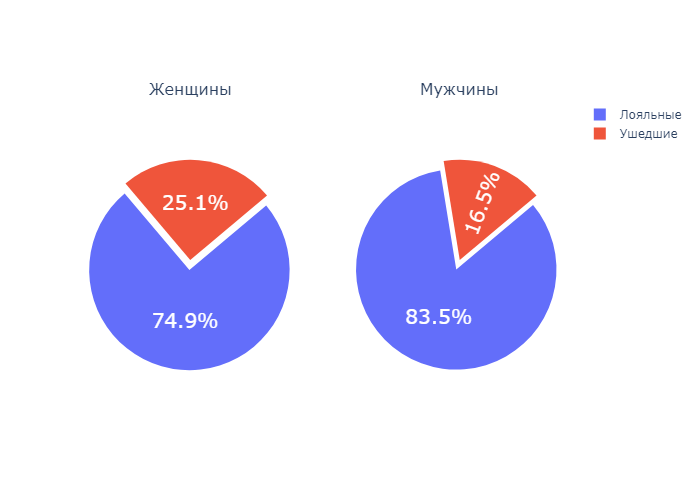

In [12]:
valuesf=[(1-churn[churn['Gender']=='Female']['Exited'].mean()), churn[churn['Gender']=='Female']['Exited'].mean()]
valuesm=[(1-churn[churn['Gender']=='Male']['Exited'].mean()), churn[churn['Gender']=='Male']['Exited'].mean()]

labels=['Лояльные', 'Ушедшие']

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Женщины","Мужчины"))

fig.add_trace(go.Pie(
    labels=labels,
    values=valuesf,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent+name',
    textinfo='percent',
    textfont=dict(size=20,color='white'),
    domain=dict(x=[0, 0.5]),
    name="Женщины"),
              row=1, col=1)


fig.add_trace(go.Pie(
    labels=labels,
    values=valuesm,
    rotation=50,
    showlegend=True,
    pull=[0.1,0,0,0,0],
    hoverinfo='label+percent+name',
    textinfo='percent',
    textfont=dict(size=20,color='white'),
    domain=dict(x=[0.5, 1.0]),
    name="Мужчины"),
              row=1, col=2)


fig.show('png')

Доля ушедших женщин составил 25.1%, что выше на 8.6% больше чем доля ушедших мужчин. Таким образом банку необходимо уделить особое внимание данной категории клиентов.

### 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

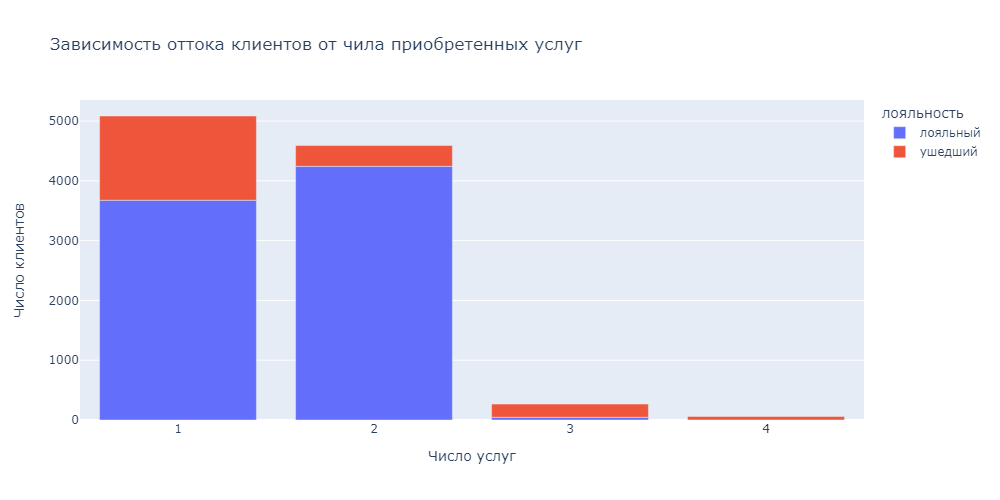

In [100]:
figg=churn.groupby(['NumOfProducts','Exited'], as_index=False).count()

fig=px.bar(
    figg,
    x='NumOfProducts',
    y='RowNumber',
    color=figg['Exited'].map({0:'лояльный', 1:'ушедший'}),
    height=500,
    width=1000,
    title='Зависимость оттока клиентов от чила приобретенных услуг',
    labels={
        'RowNumber':'Число клиентов',
        'NumOfProducts':'Число услуг',
        'Exited':'Лояльность','color': 'лояльность'
        }
)

fig.update_xaxes(nticks=5)

fig.show('png')

Из графика видно, что большинство лояльных клиентов пользуются 1-2 услугами. Клиенты с двумя услугами реже уходят. Число лояльных клиентов, которые имеют больше 2 услуг в банке равно 46. Также, можно заметить, что 60 клиентов, которые пользовались всеми услугами банка являются ушедшими.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

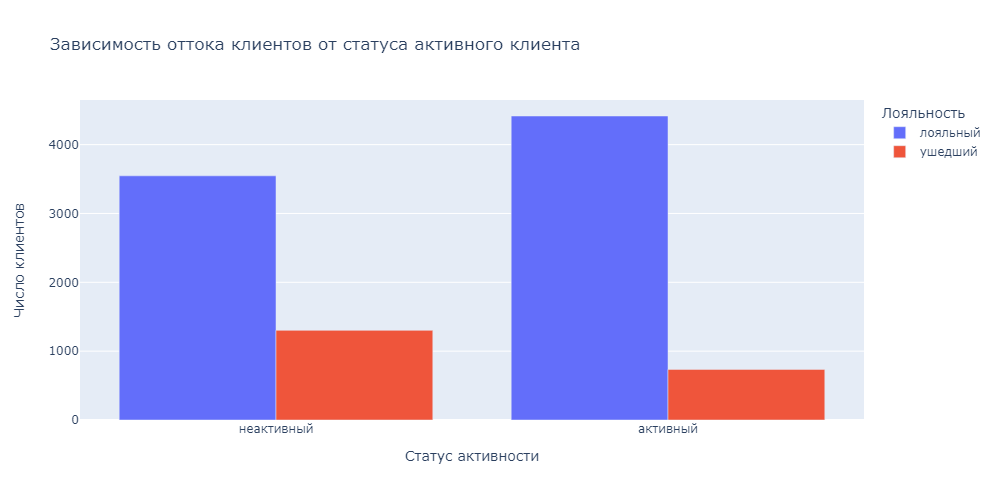

In [39]:
figg=churn.groupby(['IsActiveMember','Exited'], as_index=False).count()

fig=px.bar(
    figg,
    x=figg['IsActiveMember'].map({0:'неактивный', 1:'активный'}),
    y='RowNumber',
    color=figg['Exited'].map({0:'лояльный', 1:'ушедший'}),
    barmode='group',
    height=500,
    width=1000,
    title='Зависимость оттока клиентов от статуса активного клиента',
    labels={
        'RowNumber':'Число клиентов',
        'IsActiveMember':'Статус клиента',
        'Exited':'Лояльность','color': 'Лояльность', 'x':'Статус активности'
        }
)

fig.show('png')

Неактивные клиенты уходят чаще, что говорит о том, что присвоение статуса активного клиента может снизить вероятность отказа клиентов от обслуживания банка

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [15]:
churn['Geography'].unique() #так как клиенты банка находятся в Европе, было принято решение построить только картограмму Европы

array(['France', 'Spain', 'Germany'], dtype=object)

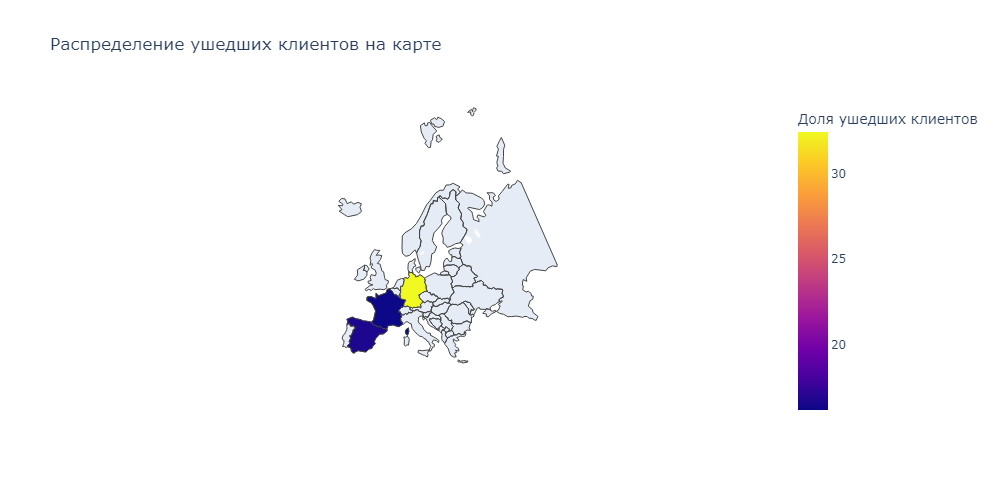

In [46]:
fig_data=churn.groupby(['Geography'], as_index=False).mean()
fig_data['percent']=fig_data['Exited']*100

fig = px.choropleth(
    data_frame=fig_data,
    locations='Geography',
    locationmode = "country names",
    color='percent',
    title='Распределение ушедших клиентов на карте',
    labels={'percent': 'Доля ушедших клиентов'},
    scope='europe',
    width=1000,
    height=500
)

#отображаем его
fig.show('png')

Наибольшая доля ушедших клиентов находится в Германии. Вероятно, что в Германии большая конкуренция среди банков и появился более выгодный. Либо же у Германии менее стабильная ситуация с ставкой, чем в Франции.

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

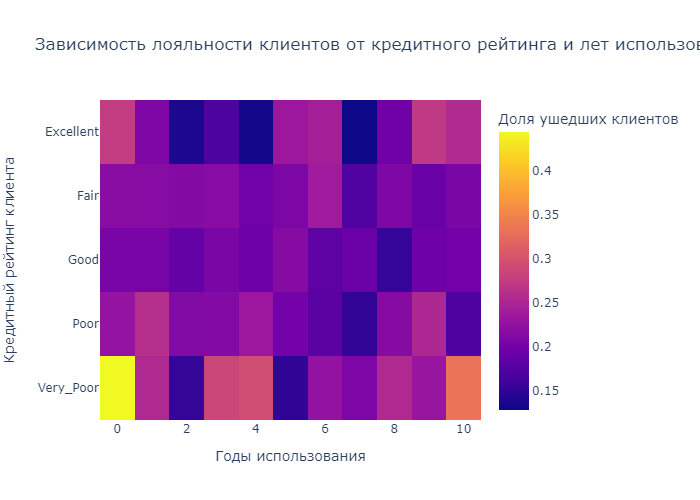

In [70]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn['CreditScoreCat']=churn['CreditScore'].apply(get_credit_score_cat)
churn['CreditScoreCat'].astype('category')

pivot_data=pd.DataFrame(churn.groupby(['CreditScoreCat', 'Tenure'], as_index=False)['Exited'].mean())

pivot=pivot_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)

fig=px.imshow(
    pivot, 
    height=500, 
    title='Зависимость лояльности клиентов от кредитного рейтинга и лет использования услугами банка',
    labels=dict(y='Кредитный рейтинг клиента',x='Годы использования', color='Доля ушедших клиентов'))

fig.show('png')


Глядя на диаграмму можно сделать вывод, что чаще всего уходят клиенты с рейтингом very poor